In [1]:
import numpy as np
import os
from neural_network import RedNeuronal
from image_processor import ImageProcessor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import json

In [2]:
def plot_training_history(training_history):
    """Graficar historial de entrenamiento"""
    try:
        if not training_history:
            print("No hay historial de entrenamiento para graficar")
            return
            
        epochs = range(1, len(training_history) + 1)
        losses = [item[0] for item in training_history]
        accuracies = [item[1] for item in training_history]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
        
        ax1.plot(epochs, losses)
        ax1.set_title('Pérdida durante el entrenamiento')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.grid(True)
        ax1.axhline(y=0.693, color='r', linestyle='--', label='Azar (ln(2))')
        ax1.legend()
        
        ax2.plot(epochs, accuracies)
        ax2.set_title('Precisión durante el entrenamiento')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.grid(True)
        ax2.axhline(y=0.5, color='r', linestyle='--', label='Azar (50%)')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f" No se pudo generar la gráfica: {e}")


In [3]:
def main():
    print("=== Entrenamiento Red Neuronal ===\n")
    
    TARGET_SIZE = (600, 800)
    EPOCHS = 100
    LEARNING_RATE = 0.01
    BATCH_SIZE = 8
    
    processor = ImageProcessor(target_size=TARGET_SIZE)
    dataset_path = "dataset"
    
    if not os.path.exists(dataset_path):
        print("No se encontró la carpeta 'dataset'.")
        return
    
    print("Cargando dataset...")
    X, y, class_names = processor.create_dataset_from_folder(dataset_path)
    if len(X) == 0:
        print("No se encontraron imágenes en el dataset.")
        return
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    n_classes = len(class_names)
    input_size = X.shape[1]
    architecture = [
        (input_size, 'input'),
        (64, 'relu'),
        (32, 'relu'),
        (n_classes, 'softmax')
    ]
    
    print("Arquitectura:")
    for i, (neurons, activation) in enumerate(architecture):
        layer_type = "Entrada" if i == 0 else ("Salida" if i == len(architecture)-1 else f"Oculta {i}")
        print(f" - Capa {layer_type}: {neurons} neuronas ({activation})")
    print()
    
    red = RedNeuronal(architecture)
    red.train(X_train, y_train, epochs=EPOCHS, learning_rate=LEARNING_RATE, batch_size=BATCH_SIZE, verbose=True)
    
    print("\nEntrenamiento completado!\n")
    
    train_loss, train_acc = red.evaluate(X_train, y_train)
    test_loss, test_acc = red.evaluate(X_test, y_test)
    
    print(f"Resultados:")
    print(f" - Precisión entrenamiento: {train_acc:.4f}")
    print(f" - Precisión prueba: {test_acc:.4f}")
    print(f" - Pérdida entrenamiento: {train_loss:.4f}")
    print(f" - Pérdida prueba: {test_loss:.4f}")
    
    print("Guardando modelo...")
    red.save_model("modelo_reconocimiento_imagenes.json")
    
    model_info = {
        'class_names': class_names,
        'target_size': TARGET_SIZE,
        'architecture': architecture,
        'training_accuracy': float(train_acc),
        'test_accuracy': float(test_acc),
        'input_size': input_size,
        'output_size': n_classes
    }
    
    with open("modelo_info.json", "w") as f:
        json.dump(model_info, f, indent=2)
    
    print("Modelo guardado.\n")
    print("Generando gráficas...")
    plot_training_history(red.training_history)


=== Entrenamiento Red Neuronal ===

Cargando dataset...
Clases encontradas: ['Darwin', 'No_Darwin']
Procesando clase 'Darwin'...
  - 20 imágenes procesadas
Procesando clase 'No_Darwin'...
  - 20 imágenes procesadas
Dataset creado: 40 imágenes, 2 clases
Arquitectura:
 - Capa Entrada: 480000 neuronas (input)
 - Capa Oculta 1: 64 neuronas (relu)
 - Capa Oculta 2: 32 neuronas (relu)
 - Capa Salida: 2 neuronas (softmax)

Epoch 1/100 - Loss: 9.7408 - Accuracy: 0.4062
Epoch 10/100 - Loss: 0.3064 - Accuracy: 0.8750
Epoch 20/100 - Loss: 0.0067 - Accuracy: 1.0000
Epoch 30/100 - Loss: 0.0026 - Accuracy: 1.0000
Epoch 40/100 - Loss: 0.0015 - Accuracy: 1.0000
Epoch 50/100 - Loss: 0.0011 - Accuracy: 1.0000
Epoch 60/100 - Loss: 0.0008 - Accuracy: 1.0000
Epoch 70/100 - Loss: 0.0006 - Accuracy: 1.0000
Epoch 80/100 - Loss: 0.0005 - Accuracy: 1.0000
Epoch 90/100 - Loss: 0.0005 - Accuracy: 1.0000
Epoch 100/100 - Loss: 0.0004 - Accuracy: 1.0000

Entrenamiento completado!

Resultados:
 - Precisión entrenamie

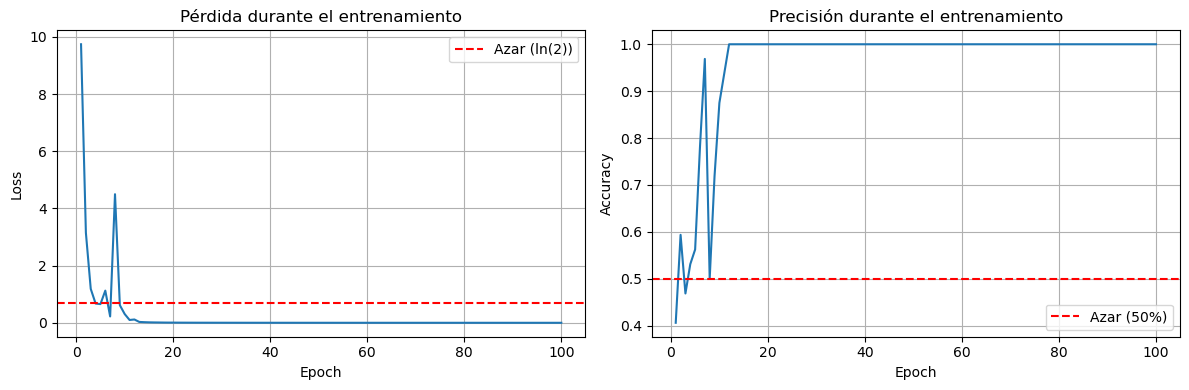

In [4]:
if __name__ == "__main__":
    main()